In [1]:
#imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img, img_to_array
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [2]:
#Data Generator for Data augmentation. Edit possible
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2)

In [3]:
#Sanity check for augmentation

img = load_img('../datasets/large_sample/almond_desert/6350.jpg')  # this is a PIL image
img=img.resize((150,150))
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
print(x.shape)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in train_datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='almond_desert', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

(150, 150, 3)


In [4]:
train_generator = train_datagen.flow_from_directory(
        '../datasets/large_sample',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='categorical',
        subset = 'training')  # since we use binary_crossentropy loss, we need binary labels



Found 36690 images belonging to 75 classes.


In [5]:
val_generator = train_datagen.flow_from_directory(
        '../datasets/large_sample',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='categorical',
        subset = 'validation')  # since we use binary_crossentropy loss, we need binary labels

Found 9152 images belonging to 75 classes.


In [6]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'almond_desert', 1: 'apple_pine', 2: 'baby_cabbage', 3: 'breakfast_burritos', 4: 'cake', 5: 'candied_haw', 6: 'chinese_mitten_crab', 7: 'clam_juice_chicken_feet', 8: 'coconut_cake', 9: 'coffee', 10: 'cool_noodles', 11: 'corn_cake', 12: 'donuts', 13: 'double_cooked_pork_slices', 14: 'dry_fried_noodle', 15: 'duck_neck', 16: 'dumpling_ham', 17: 'dumplings', 18: 'egg_pudding', 19: 'egg_tart', 20: 'egg_waffle', 21: 'egg_yolk_puff', 22: 'ferment_cake', 23: 'french_toast', 24: 'fried_dough_twists', 25: 'fried_rice', 26: 'fruit_salad', 27: 'grilled_cold_noodles', 28: 'grilled_fish', 29: 'gui_ling_jelly', 30: 'hong_kong_style_french_toast', 31: 'hot_and_sour_soup', 32: 'hot_pot', 33: 'huntun', 34: 'ice_cream', 35: 'mango_crepe', 36: 'mashed_potato', 37: 'milk_pudding', 38: 'millet_porridge', 39: 'mixed_porridge', 40: 'moon_cake', 41: 'pancake', 42: 'pickle', 43: 'pineapple_buns', 44: 'pizza', 45: 'pork_knuckle', 46: 'potato_shred', 47: 'puffs', 48: 'pumpkin_porridge', 49: 'red_bean_pudding'

In [7]:
#Naive Model

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(75))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [9]:
model.fit_generator(train_generator,
                   steps_per_epoch = 100,
                   epochs = 1, validation_data = val_generator)

Epoch 1/1
100/100 [==============================] - 125s 1s/step - loss: 4.3066 - acc: 0.0187 - val_loss: 4.2575 - val_acc: 0.0288


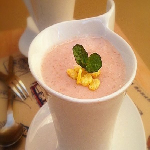

(1, 150, 150, 3)


In [10]:
img = load_img('../datasets/large_sample/almond_desert/6350.jpg')  # this is a PIL image
img=img.resize((150,150))
display(img)
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

print(x.shape)

In [11]:

y = model.predict(x)

In [12]:
labels[np.argmax(y)]

'apple_pine'

In [21]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 conv2d
1 activation
2 max_pooling2d
3 conv2d_1
4 activation_1
5 max_pooling2d_1
6 conv2d_2
7 activation_2
8 max_pooling2d_2
9 flatten
10 dense
11 activation_3
12 dropout
13 dense_1
14 activation_4


In [15]:
small_train_generator = train_datagen.flow_from_directory(
        '../datasets/small_sample',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='categorical',
        subset = 'training')

Found 100 images belonging to 25 classes.


In [16]:
small_val_generator = train_datagen.flow_from_directory(
        '../datasets/small_sample',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='categorical',
        subset = 'validation')

Found 25 images belonging to 25 classes.


In [22]:
for layer in model.layers[:13]:
    layer.trainable=False


In [23]:
for i,layer in enumerate(model.layers):
  print(i,layer.trainable)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 True
14 True


In [41]:
model.pop()
model.add(Dense(25))
model.add(Activation('sigmoid'))

In [42]:

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [44]:
model.fit_generator(small_train_generator,
                   steps_per_epoch = 100,
                   epochs = 1, validation_data = small_val_generator)

Epoch 1/1
100/100 [==============================] - 27s 266ms/step - loss: 3.1359 - acc: 0.0703 - val_loss: 3.1011 - val_acc: 0.0800


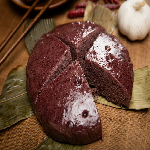

(1, 150, 150, 3)


In [45]:
img = load_img('../datasets/small_sample/black_rice_cake/10585.jpg')  # this is a PIL image
img=img.resize((150,150))
display(img)
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

print(x.shape)

In [46]:
labelsSmall = (small_train_generator.class_indices)
labelsSmall = dict((v,k) for k,v in labelsSmall.items())
print(labelsSmall)

{0: 'Omelette', 1: 'Snowflake_Flaky_Pastry', 2: 'black_rice_cake', 3: 'black_sesame_paste', 4: 'boiled_corn', 5: 'braised_pork', 6: 'cheese', 7: 'claypot', 8: 'french_fries', 9: 'fried_chestnuts', 10: 'frozen_lemon_tea', 11: 'glutinous_rice_ball_with_peanut_and_sesame_sweets', 12: 'glutinous_rice_dumpling', 13: 'green_bean_cake', 14: 'hot_dog', 15: 'layer_cake', 16: 'mango_pomelo_sago', 17: 'onion_rings', 18: 'persimmon_pancake', 19: 'poon_choi', 20: 'pop_corn', 21: 'sampan_porridge', 22: 'scrambled_eggs_with_tomatoes', 23: 'steak', 24: 'stir_fried_lettuce'}


In [47]:
y = model.predict(x)

In [48]:
labels[np.argmax(y)]

'candied_haw'